In [33]:
import pickle
import pandas as pd
df = pd.read_csv("../train_scaled.csv", index_col=0)
df
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [34]:
X

,/JS,/OpenAction,/AcroForm,/Annot,/Length,/Filter,/FlateDecode,/XObject,/CreationDate,/Author,...,temptmp,eval,replace,fromCharCode,getAnnots,ip,xref_size,trailer_size,file_size,nof_stream
file_001,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.330271,0.875
file_002,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.147688,1.000
file_003,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.150261,1.000
file_011,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.167216,1.000
file_012,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.367451,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
file_5336,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.148746,1.000
file_5337,0.000000,0.0,0.0,0.0,0.0,0.666667,0.333333,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.500000,0.639018,0.375
file_5341,0.666667,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.333333,0.153243,1.000
file_5342,0.000000,0.0,0.0,0.0,0.0,0.666667,0.666667,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.500000,0.649215,0.500


In [35]:
y

file_001     1
file_002     1
file_003     1
file_011     1
file_012     1
            ..
file_5336    1
file_5337    0
file_5341    1
file_5342    0
file_5343    1
Name: class, Length: 2188, dtype: int64

In [36]:
y.value_counts()

class
1    1710
0     478
Name: count, dtype: int64

In [37]:
model = pickle.load(open("../models/max_f1.pickle", "rb"))

# 1. Feature Importance

<Axes: >

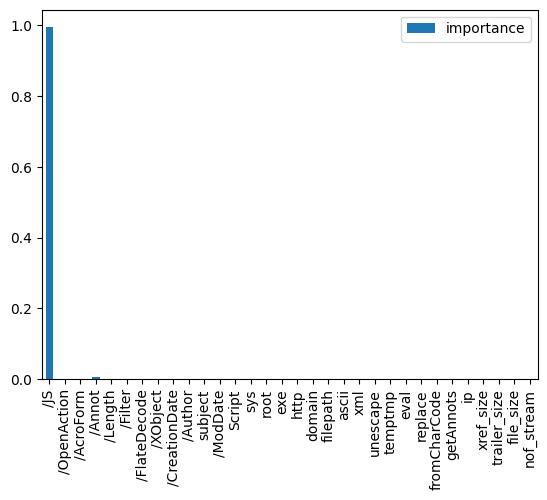

In [38]:
feature_importance_df = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feature_importance_df
feature_importance_df.plot.bar()

# 2. SHAP(global)

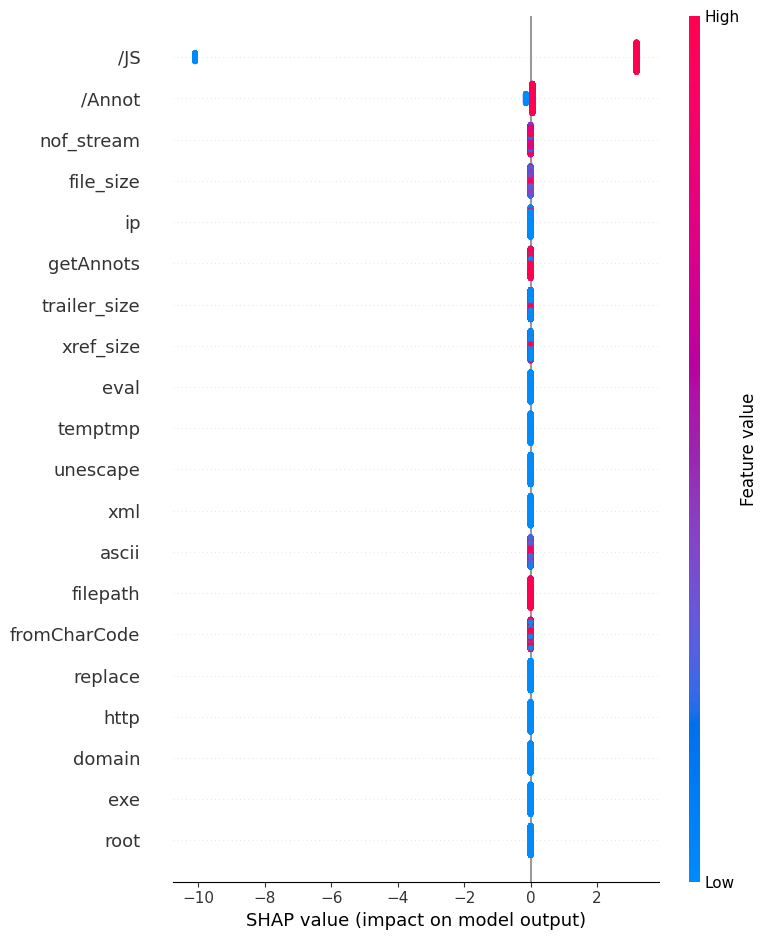

In [49]:
import shap
shap.initjs()
# explainer = shap.TreeExplainer(model)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# 2. SHAP(Local)

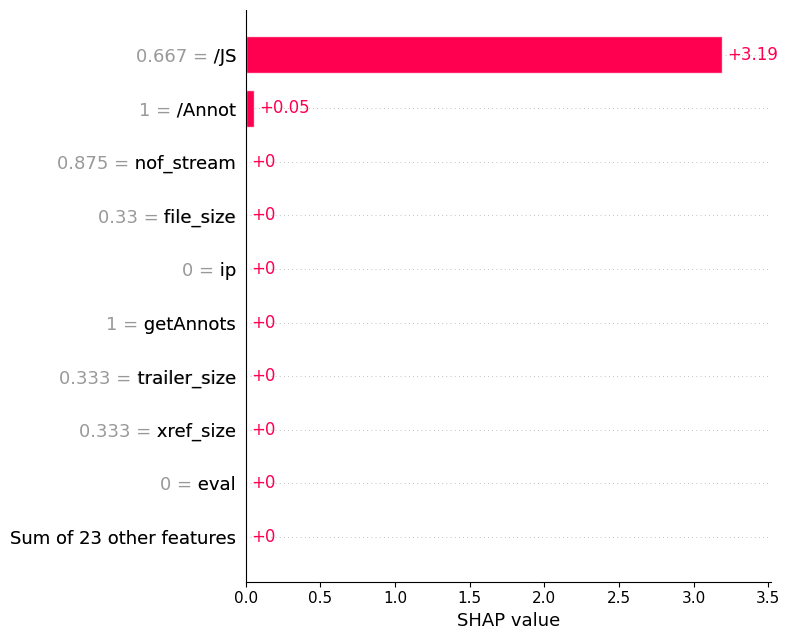

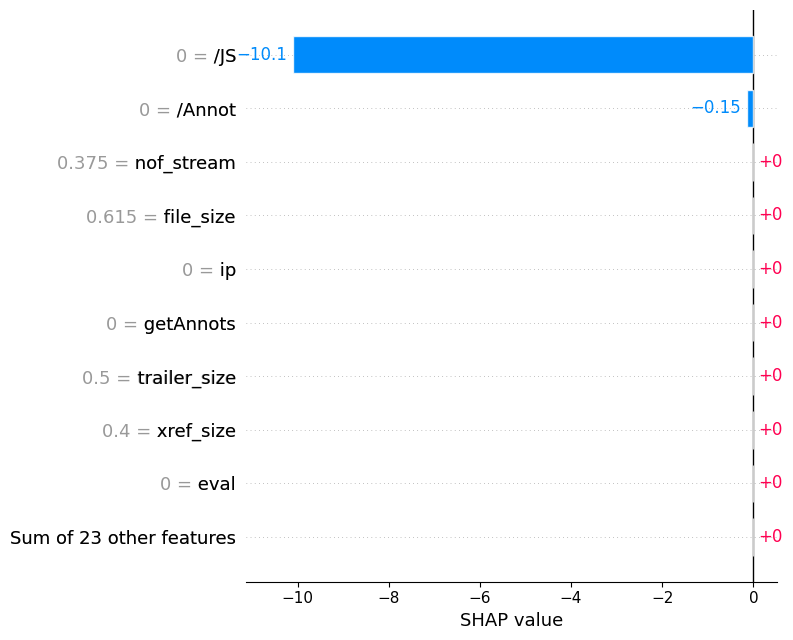

In [54]:
shap.plots.bar(shap_values[0])
shap.plots.bar(shap_values[100])